# Segmentação de clientes de um supermercado

Um supermercado, através de cartões de fidelidade, possui alguns dados básicos sobre seus clientes, como idade, gênero, renda anual e pontuação de gastos. Tal pontuação é algo que o supermercado atribui ao cliente com base em parâmetros definidos, como comportamento do cliente e dados de compra.

O objetivo deste projeto é segmentar os clientes com base em seus dados de compra, para que o supermercado possa entender melhor os clientes e formular estratégias de negócios de acordo.

Link original para o dataset: https://www.kaggle.com/code/joshuaswords/data-visualization-clustering-mall-data/notebook

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version

bibliotecas = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")

Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.8.3
NumPy                |     1.25.2
Pandas               |      2.2.1
Scikit-Learn         | 1.4.1.post1
Seaborn              |     0.12.2

Versão do Python: 3.11.5


In [2]:
DADOS  = "../dados/Mall_Customers.csv"

df = pd.read_csv(DADOS)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
with pd.option_context("display.float_format","{:.2f}".format):
    display(df.describe())


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [5]:
df.describe(exclude="number")

,Gender
count,200
unique,2
top,Female
freq,112


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df)

# profile.to_file("../reports/eda_supermercado_kaggle.html")

In [8]:
df_analise = df.copy()
df_analise = df_analise.drop("CustomerID", axis=1)
df_analise.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


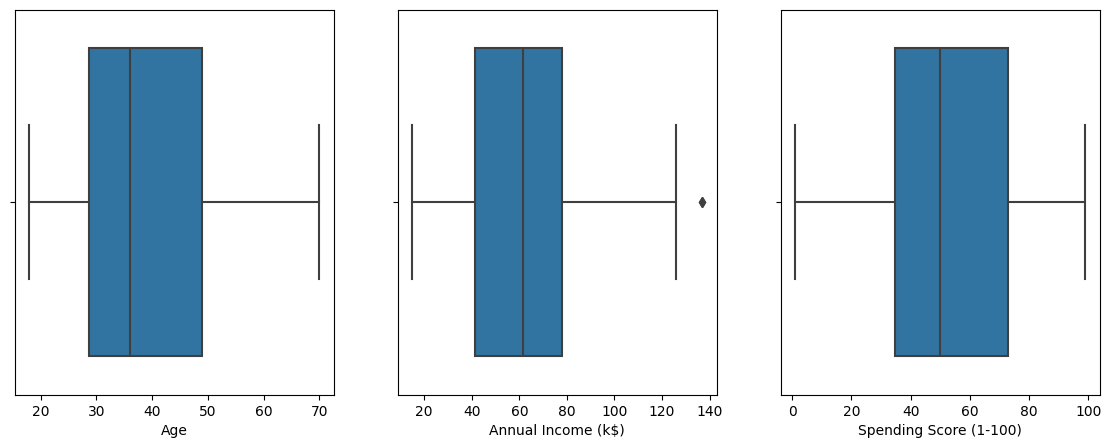

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(14,5))

for ax, col in zip(axs, df_analise.select_dtypes("number")):
    sns.boxplot(data=df_analise,x=col, ax=ax)

plt.show()

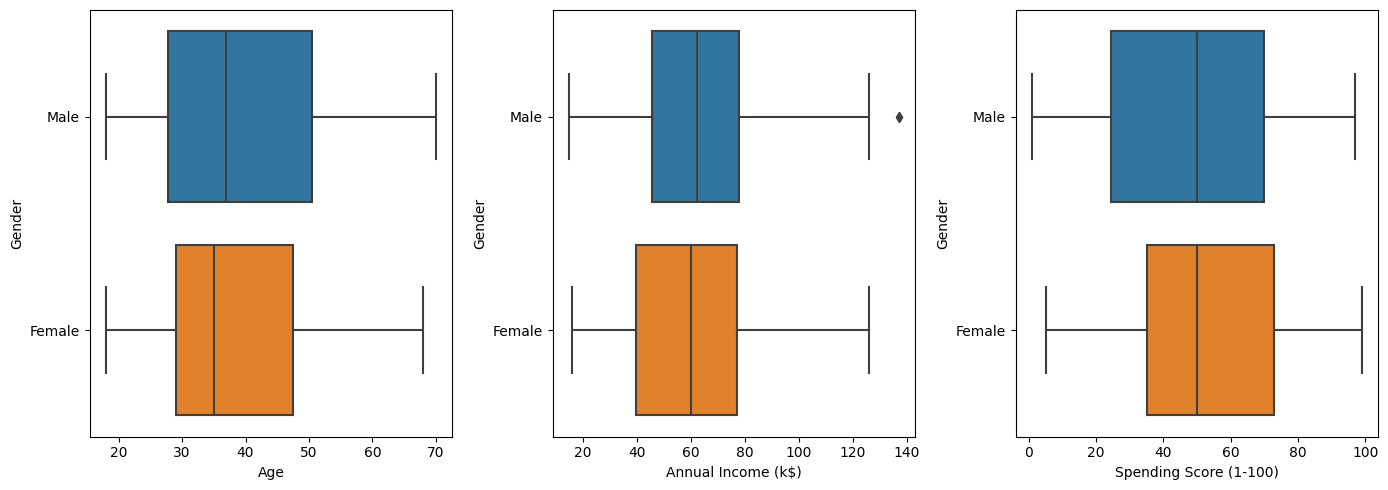

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(14,5), tight_layout=True)

for ax, col in zip(axs, df_analise.select_dtypes("number")):
    sns.boxplot(data=df_analise,x=col, y="Gender" ,ax=ax)

plt.show()

In [15]:
df_analise.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [16]:
with pd.option_context("display.float_format","{:.3f}".format):
    display(df_analise.corr(numeric_only=True, method="spearman"))

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000,0.020,-0.345
Annual Income (k$),0.020,1.000,0.008
Spending Score (1-100),-0.345,0.008,1.000
